# Assignment 2

**Assignment 2: Evolutionary Algorithms**

**Goal**: Implement an Evolutionary Algorithm to solve continuous and discrete problems.

* Part1: continuous problem that is concerned with finding minimum of functions, in this case, Sphere and Ackley
  functions.

* Part 2: discrete problem that is concerned with finding the solution for the N-queens problem. Could be defined as minimization or maximization.

For both parts, this assignment requires implementation of the main components of an evolutionary algorithm (i.e. *crossover*, *mutation*, *parent selection*, etc), and construction of your algorithm to solve given problems.

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

**Setup**

**Install Prerequisites (Part 1 and 2)**

In [1]:
# Run this cell to install the required libraries
# %pip install numpy matplotlib scipy

**Imports (Part 1 and 2)**

In [2]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums

# Set seed
np.random.seed(42)

**Jupyter Notebook Magic (Part 1 and 2)**

In [3]:
# Enables inline matplotib graphs
# %matplotlib inline

# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
# %matplotlib qt5
# %pip install PyQt5
plt.ion()

## Part 1: Continuous Optimization (5 points total)

In this part of the assignment you will implement an Evolutionary Algorithm to find the minimum of the following functions: [Sphere](https://www.sfu.ca/~ssurjano/spheref.html) and [Ackley](https://www.sfu.ca/~ssurjano/ackley.html) functions.


**Function Definitions \& Plotting**

**Sphere Function**


In [4]:
def Sphere(x):
    """source: https://www.sfu.ca/~ssurjano/spheref.html"""
    dimension = x.shape[0]
    return (1 / dimension) * (sum(x**2))

**Ackley Function**

In [5]:
def Ackley(x):
    """source: https://www.sfu.ca/~ssurjano/ackley.html"""

    # Ackley function parameters
    a = 20
    b = 0.2
    c = 2 * np.pi
    dimension = len(x)

    # Individual terms
    term1 = -a * np.exp(-b * np.sqrt(sum(x**2) / dimension))
    term2 = -np.exp(sum(np.cos(c * xi) for xi in x) / dimension)
    return term1 + term2 + a + np.exp(1)

**Plotting**

In [6]:
# Generate data for plotting
boundary_point, resolution = 5, 500
x = np.linspace(-boundary_point, boundary_point, resolution)
y = np.linspace(-boundary_point, boundary_point, resolution)

# Generate the coordinate points
X, Y = np.meshgrid(x, y)
positions = np.column_stack([X.ravel(), Y.ravel()])

# Get depths for all coordinate positions
z_unimodal = np.array(list(map(Sphere, positions))).reshape([resolution, resolution])
z_multimodal = np.array(list(map(Ackley, positions))).reshape([resolution, resolution])

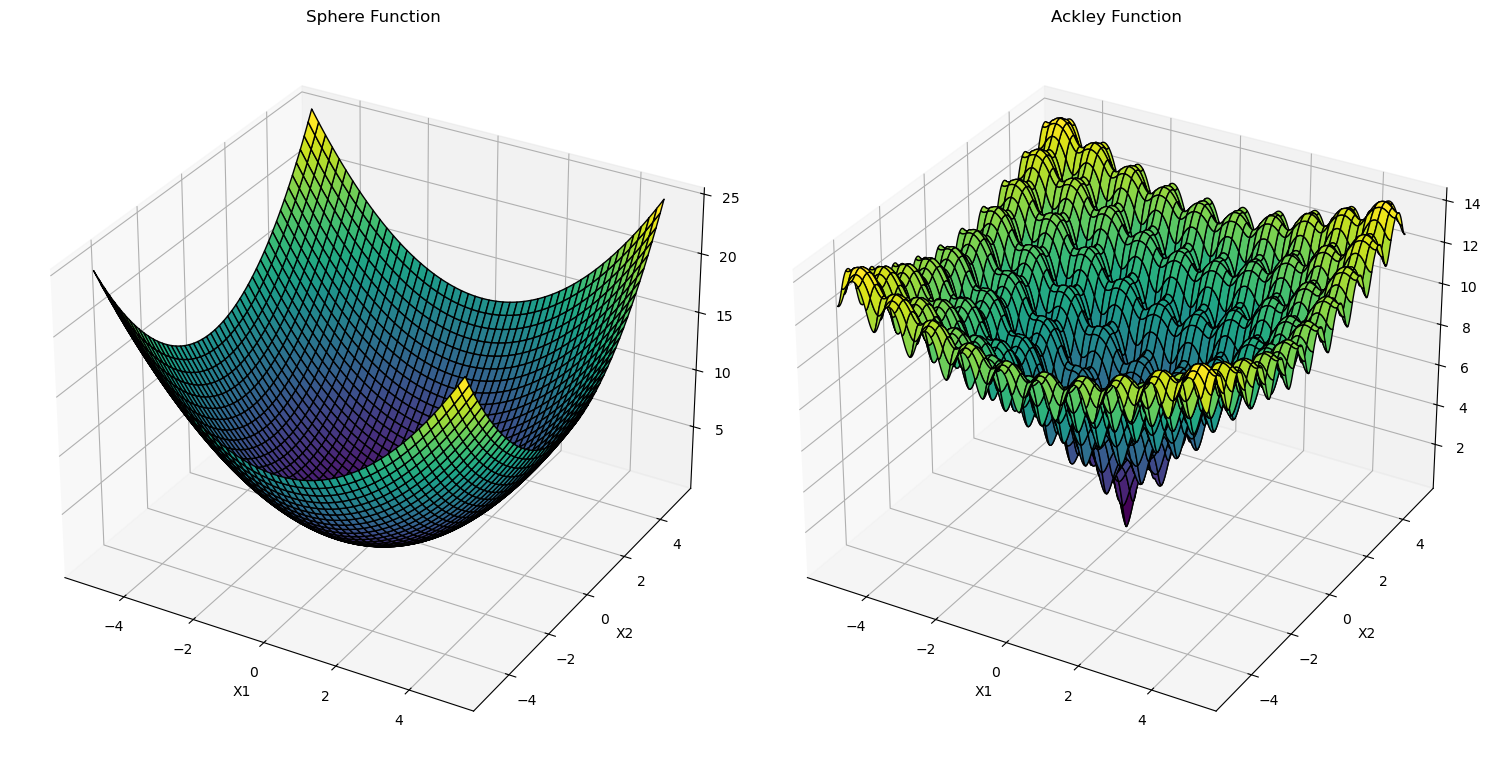

In [7]:
# Create 3D plot
fig = plt.figure(figsize=(15, 8))

titles = ["Sphere Function", "Ackley Function"]
for idx, z in enumerate([z_unimodal, z_multimodal]):
    # Create sub-plot
    ax = fig.add_subplot(121 + idx, projection="3d")

    # Plot the surface
    ax.plot_surface(X, Y, z, cmap="viridis", edgecolor="k")

    # Set labels
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title(titles[idx])
    # ax.autoscale(True)

# Show the plot
plt.tight_layout()
plt.show()

---
**Question 1.1 (0-0.2 pt):** Looking at the Sphere and Ackley functions, please discuss the characteristics of these functions and compare their complexity in terms of local and global optima.

**Answer:** The Sphere function is a simple quadratic function, where there is only one global minimum and no local minima. It is continuous, convex and any point far from the origin has a higher function value. The Ackley function is much more sophisticated, where there is one global minimum at origin and infinite local minima. It is continuous, non-convex but smooth.

---
**Question 1.2 (0-0.25-0.5 pt):** Please provide a pseudo-code for your evolutionary algorithm. Please try to be as formal as possible!

**Answer:** The pseudocode is given as:
```
// Initialize population
population = initialize_population(population_size, num_dimensions)
// Evaluate the fitness of the population
fitness = evaluate_population(population, Sphere)
// Find the best individual
best_individual = population[INDEX(MIN(fitness))]
best_fitness = MIN(fitness)
// Iteration
generation = 0
WHILE generation < max_generations:
    // Selection, args: population, fitness
    parents = parents_selection(population, fitness)

    // Crossover, args: parents, p_crossover
    offspring = crossover(parents, p_crossover)

    // Mutation, args: offspring, mutation_rate
    offspring = mutate(offspring, mutation_rate)

    // Evaluate the new population, args: offspring, objective_function
    offspring_fitness = evaluate_population(offspring, Sphere)

    // Replace, args: population, fitness, offspring, offspring_fitness
    population, fitness = replace_population(population, fitness, offspring, offspring_fitness)

    // Update the best individual
    IF MIN(offspring_fitness) < best_fitness:
        best_individual = offspring[INDEX(MIN(offspring_fitness))]
        best_fitness = MIN(offspring_fitness)
    END IF

    // Update the number of iterations
    generation += 1

    // Check if the global minimum is reached
    IF best_fitness <= global_minimum:
        BREAK
    END IF
END WHILE

// Return the best individual and its fitness
RETURN best_individual, best_fitness
```

---
**Task 1.1: Implementation of Evolutionary Algrotihm (0-0.65-1.3-1.95-2.6 pt):** Implement an evolutionary algorithm and its components to find the minimum point of a function. Here, domain should be between [-50,50].

In [8]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.65 pts if the code works but some functions are incorrect and it is badly explained
# 1.3 pts if the code works but some functions are incorrect but it is explained well
# 1.95 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 2.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################

import time

np.random.seed(time.time_ns() % 2**32)


def initialization(population_size, num_dimensions):
    """
    Initialize the starting population with random individuals.
    Each gene of an individual corresponds to a point on a dimension in the function.
    """
    # Create an initial population of size (population_size, num_dimensions), row is an individual, column is a dimension(gene).
    x = np.random.uniform(
        low=-boundary_point, high=boundary_point, size=(population_size, num_dimensions)
    )
    return x  # Return population


def evaluation(x, objective_function):
    """Evaluate the fitness of the population members."""
    fitness = np.apply_along_axis(objective_function, 1, x)
    return fitness


def crossover(x_parents, p_crossover):
    """Perform crossover to create offsprings."""
    offspring = []
    n_parents = x_parents.shape[0]
    n_dimension = x_parents.shape[1]

    for _ in range(n_parents // 2):
        # Randomly select two parents
        parents_indices = np.random.choice(range(n_parents), size=2, replace=False)

        if np.random.rand() < p_crossover:
            # Exchange genes at a random crossover point
            crossover_point = np.random.randint(1, n_dimension)

            # Create offspring by combining genes from selected parents
            parent1 = x_parents[parents_indices[0]]
            parent2 = x_parents[parents_indices[1]]
            # Perform crossover, the first child gets the first part of parent1 and the second part of parent2, and vice versa
            child1 = np.hstack((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.hstack((parent2[:crossover_point], parent1[crossover_point:]))

            offspring.append(child1)
            offspring.append(child2)
        else:
            # If no crossover was done, just pass parents to the next generation
            offspring.extend(x_parents[parents_indices])

    return np.array(offspring)


def mutation(x, m_rate):
    """Apply mutation to an individual."""
    for _ in range(len(x)):
        if np.random.rand() < m_rate:

            # Randomly select a gene to mutate
            gene_idx = np.random.randint(len(x))

            # Mutate the selected gene with a random value within the boundaries
            x[gene_idx] = np.random.uniform(-boundary_point, boundary_point)
    return x


def parent_selection(x, f):
    """Select parents for the next generation
        Two methods can be used: select the best individual or randomly select individuals for the tournament.
    """
    tournament_size = 3  # Number of individuals participating in the tournament, the best one/a random one will be selected
    x_parents = []
    f_parents = []

    # Assume the population size of parents is the same as the population size of the current generation
    while len(x_parents) < len(x):
        indices = np.random.choice(range(len(x)), size=tournament_size, replace=False)

        # Select randomly
        parents_idx = np.random.choice(indices)
        
        # Append the best individual to the parents
        # parents_idx = indices[np.argmin(f[indices])]
        
        x_parents.append(x[parents_idx])
        f_parents.append(f[parents_idx])

    return np.array(x_parents), np.array(f_parents)


def survivor_selection(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""
    # x and x_offspring are (population_size, num_dimensions) arrays, f and f_offspring are 1D arrays
    combined_population = np.vstack((x, x_offspring))
    combined_fitness = np.hstack((f, f_offspring))

    # Convert fitness values to probabilities
    fitness_probabilities = 1.0 / combined_fitness
    fitness_probabilities /= np.sum(fitness_probabilities)

    # Select individuals randomly based on their fitness probabilities (Roulette Wheel Selection)
    survivors_idx = np.random.choice(
        range(len(combined_fitness)),
        size=len(x),
        replace=False,
        p=fitness_probabilities,
    )
    
    # Selct the best individuals
    # survivors_idx = np.argsort(combined_fitness)[:len(x)]

    x = combined_population[survivors_idx]
    f = combined_fitness[survivors_idx]

    return x, f


def ea(
    # hyperparameters of the algorithm
    population_size,
    max_fit_evals,  # Maximum number of evaluations
    p_crossover,  # Probability of performing crossover operator
    m_rate,  # mutation rate
    dimensions,  # number of dimensions
    objective_function,  # objective function to be minimized
):
    """
    Methodology: Record the best individual in each generation, either the best in its parent generation or a new offspring.
    """
    # Initialize population
    x = initialization(population_size, dimensions)
    f = evaluation(x, objective_function)

    # Calculate the maximum number of generations
    max_generations = int(max_fit_evals / population_size)

    # Find the best individual and append to a list to keep track in each generation
    idx = np.argmin(f)
    x_best = [x[idx]]
    f_best = [f[idx]]

    # Loop over the generations
    for _ in range(max_generations - 1):
        # Perform the EA steps
        ################################################################
        # Select parents
        x_parents = parent_selection(x, f)[0]

        # Generate offsprings through crossover
        x_offspring = crossover(x_parents, p_crossover)
        # Apply mutation
        for individual in x_offspring:
            mutation(individual, m_rate)

        # Evaluate offsprings
        f_offspring = evaluation(x_offspring, objective_function)
        # Select survivors
        x, f = survivor_selection(x, f, x_offspring, f_offspring)

        ################################################################
        # Find the best individual in current generation and add to the list
        idx = np.argmin(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best < f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])
    return x_best, f_best  # return the best solution and fitness in each generation

#### Check Your Implementation: Running The Evolutionary Algorithm

Run the cell below, if you implemented everything correctly, you should see
the algorithm running.

In [9]:
# Dummy parameters
kwargs = {
    "population_size": 20,
    "max_fit_evals": 1000,  # maximum number of fitness evaluations
    "p_crossover": 0.9,  # crossover probability
    "m_rate": 0.1,  # mutation rate
    "dimensions": 10,
    "objective_function": Sphere,
}

# Run the EA
x_best, f_best = ea(**kwargs)

# Print the best individual and its fitness
print("Best solution:", x_best[-1])
print("Best Fitness:", f_best[-1])

# Clear cache
del x_best, f_best, kwargs

Best solution: [ 0.47201863 -0.39460698  0.10936127 -0.4809311   0.57325393  0.18905627
 -0.17854094  0.54444089  0.04155899 -0.79015602]
Best Fitness: 0.19404996317752415


**Reults and statistical analysis**

Remember that the EAs are sthocastic algorithms that can produce different results as a result of independent runs. 

How do we find overal performance of the algorithm and compare the results?

By running multiple times and performing statitical tests. Therefore, you would need to run your algorithm **20 times** and plot the *average* results.

First, we would need to **defining some helper functions** for finding the average and standard deviations of multiple runs and ploting them. In the next few cells, we give you some pre-made functions for this purpose. 

There is no work for you to do, but do look over them and get familiar with how they operate.

In [10]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    f_best = np.array(f_best)
    avg = np.mean(f_best, axis=0)
    std = np.std(f_best, axis=0)
    return avg, std

In [11]:
def run_experiment(population_size, p_crossover, m_rate):
    runs = 20  # DO NOT CHANGE - number of runs
    max_fit_evals = 5000  # DO NOT CHANGE

    sphere10D = []
    sphere50D = []
    ackley10D = []
    ackley15D = []

    for _ in range(runs):
        _, f_best_sphere10D = ea(
            population_size[0],
            max_fit_evals,
            p_crossover[0],
            m_rate[0],
            10,
            Sphere,
        )
        _, f_best_sphere50D = ea(
            population_size[1],
            max_fit_evals,
            p_crossover[1],
            m_rate[1],
            50,
            Sphere,
        )
        _, f_best_ackley10D = ea(
            population_size[2],
            max_fit_evals,
            p_crossover[2],
            m_rate[2],
            10,
            Ackley,
        )
        _, f_best_ackley15D = ea(
            population_size[3],
            max_fit_evals,
            p_crossover[3],
            m_rate[3],
            15,
            Ackley,
        )

        sphere10D.append(f_best_sphere10D)
        sphere50D.append(f_best_sphere50D)
        ackley10D.append(f_best_ackley10D)
        ackley15D.append(f_best_ackley15D)

    # find average and std of the runs
    sphere10D_avg, sphere10D_std = calculate_mean_std(sphere10D)
    sphere50D_avg, sphere50D_std = calculate_mean_std(sphere50D)
    ackley10D_avg, ackley10D_std = calculate_mean_std(ackley10D)
    ackley15D_avg, ackley15D_std = calculate_mean_std(ackley15D)

    avgs = [sphere10D_avg, sphere50D_avg, ackley10D_avg, ackley15D_avg]
    stds = [sphere10D_std, sphere50D_std, ackley10D_std, ackley15D_std]
    all_runs = [
        sphere10D,
        sphere50D,
        ackley10D,
        ackley15D,
    ]

    return avgs, stds, all_runs

In [12]:
def generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2,
    stds_experiment_2,
    n_columns,
    n_queens,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(18, 6))

    for i in range(len(avgs_experiment_1)):
        if avgs_experiment_2 is not None:
            # Plot data for subplot 1
            axes[i].plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            axes[i].fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
            axes[i].set_ylim(bottom=0)

            if n_queens:
                axes[i].set_ylim(top=n_queens[i])

        axes[i].plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        axes[i].fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        axes[i].set_title(labels[i])
        axes[i].set_ylim(bottom=0)
        if n_queens:
            axes[i].set_ylim(top=n_queens[i])

    # Set common labels and title
    for ax in axes:
        ax.set_xlabel("Generations")
        ax.set_ylabel("Average Best Fitness")
        ax.legend()

    plt.tight_layout()

#### Running The Experiments

In the following cell we run the EA over several different hyper-parameter values.

In [13]:
population_size = [50, 50, 50, 50]  # DO NOT CHANGE
p_crossover = [0.8, 0.8, 0.8, 0.8]  # DO NOT CHANGE
m_rate = [0.1, 0.1, 0.1, 0.1]  # DO NOT CHANGE

avgs_experiment_1, stds_experiment_1, all_runs_experiment_2 = run_experiment(
    population_size, p_crossover, m_rate
)

#### Plotting The Results

In the following cell we plot the results of the experiments.

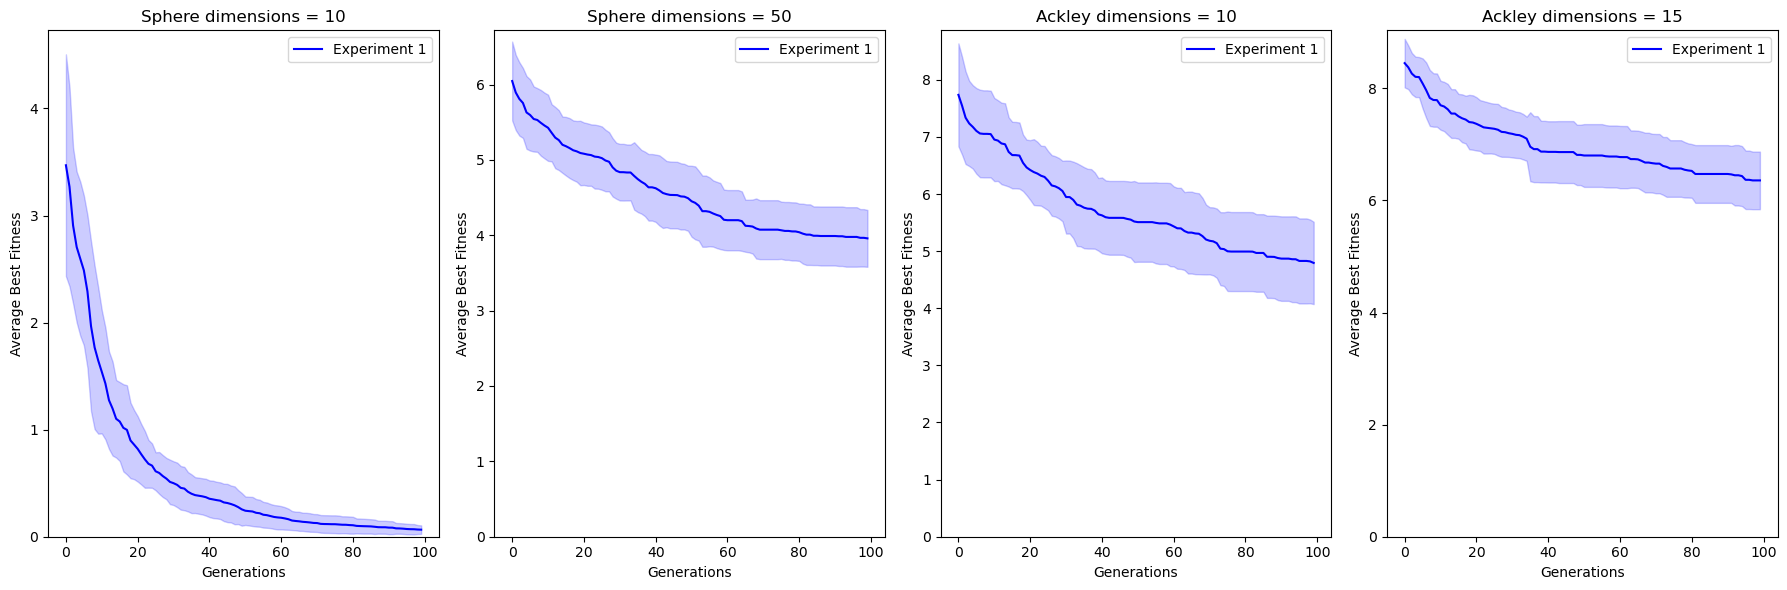

In [14]:
labels = [  # DO NOT CHANGE
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=4,
    n_queens=None,
)

---

**Question 1.3 (0-0.25-0.5 pt):** Describe the results that you see in the line graphs. How is the performance of the EA on Sphere and Ackley functions? How the results are different between functions and dimensions? What causes these differences?

**Answer:** It is easier to discover a optimum in the Sphere function than in the Ackley function in lower generations. The performance of two functions tends to be distinctive at lower dimensions and similar at higher dimensions. The performance of the Sphere function differs significantly between low and high dimensions, while the Ackley function is less different. The increase of dimensionality is the main reason of these differences, where the search space grows exponentially. The Sphere function is a convex function whose global minimum remains obvious as the dimension increases, while the Ackley function has multiple local minima, and as the dimension increases, it becomes more difficult to find the global minimum.

---
**Improve Your Results**

Experiment with the hyperparameters of the algorithm and find a set of parameters that can perform better than the previous results. Compare the results using statistical test and find a settings where there is a statistically significant improvement.

You can adjust the *population size*, *crossover probability* and *mutation rate* to find the settings that can work statistically better relative to the previous results. Please look at the "ADJUST THESE VALUES" part to experiment and improve your solutions.

Optionally, you can also improve your algorithm by implementing/changing strategies used 

In [15]:
# Grading (bonus points):
# 0.4 pts bonus for the optional improvement: if you implement different strategy, it works and produces significantly better results
# Different strategy could be a different implementation of the mutation/crossover/parent or survival selection mechanisms


# Implement your strategy here and integrate with the Evolutionary Algorithm
# PLEASE FILL IN

def parent_selection(x, f):
    """Select parents for the next generation
        Two methods can be used: select the best individual or randomly select individuals for the tournament.
    """
    tournament_size = 3  # Number of individuals participating in the tournament, the best one/a random one will be selected
    x_parents = []
    f_parents = []

    # Assume the population size of parents is the same as the population size of the current generation
    while len(x_parents) < len(x):
        indices = np.random.choice(range(len(x)), size=tournament_size, replace=False)

        # Select randomly
        # parents_idx = np.random.choice(indices)
        
        # Append the best individual to the parents
        parents_idx = indices[np.argmin(f[indices])]
        
        x_parents.append(x[parents_idx])
        f_parents.append(f[parents_idx])

    return np.array(x_parents), np.array(f_parents)


def survivor_selection(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""
    # x and x_offspring are (population_size, num_dimensions) arrays, f and f_offspring are 1D arrays
    combined_population = np.vstack((x, x_offspring))
    combined_fitness = np.hstack((f, f_offspring))

    # Convert fitness values to probabilities
    # fitness_probabilities = 1.0 / combined_fitness
    # fitness_probabilities /= np.sum(fitness_probabilities)

    # Select individuals randomly based on their fitness probabilities (Roulette Wheel Selection)
    # survivors_idx = np.random.choice(
    #     range(len(combined_fitness)),
    #     size=len(x),
    #     replace=False,
    #     p=fitness_probabilities,
    # )
    
    # Selct the best individuals
    survivors_idx = np.argsort(combined_fitness)[:len(x)]

    x = combined_population[survivors_idx]
    f = combined_fitness[survivors_idx]

    return x, f


In [31]:
################################################################
"""
Same hyperparameters with different parent and survivor selection strategies    
"""
population_size_2 = [  # ADJUST THESE VALUES
    50,
    50,
    50,
    50,
]
p_crossover_2 = [  # ADJUST THESE VALUES
    0.8,
    0.8,
    0.8,
    0.8,
]
m_rate_2 = [  # ADJUST THESE VALUES
    0.1,
    0.1,
    0.1,
    0.1,
]

################################################################

In [44]:
################################################################
"""
Same strategy as experiment 2 with different hyperparameters   
"""
population_size_3 = [  # ADJUST THESE VALUES
    50,
    50,
    50,
    50,
]
p_crossover_3 = [  # ADJUST THESE VALUES
    0.6,
    0.6,
    0.6,
    0.6,
]
m_rate_3 = [  # ADJUST THESE VALUES
    0.1,
    0.15,
    0.2,
    0.25,
]

################################################################

**Running the experiment again**

In [32]:
avgs_experiment_2, stds_experiment_2, all_runs_experiment_3 = run_experiment(
    population_size_2, p_crossover_2, m_rate_2
)

In [45]:
avgs_experiment_3, stds_experiment_3, all_runs_experiment_3 = run_experiment(
    population_size_3, p_crossover_3, m_rate_3
)

**Plotting the new and previous results**

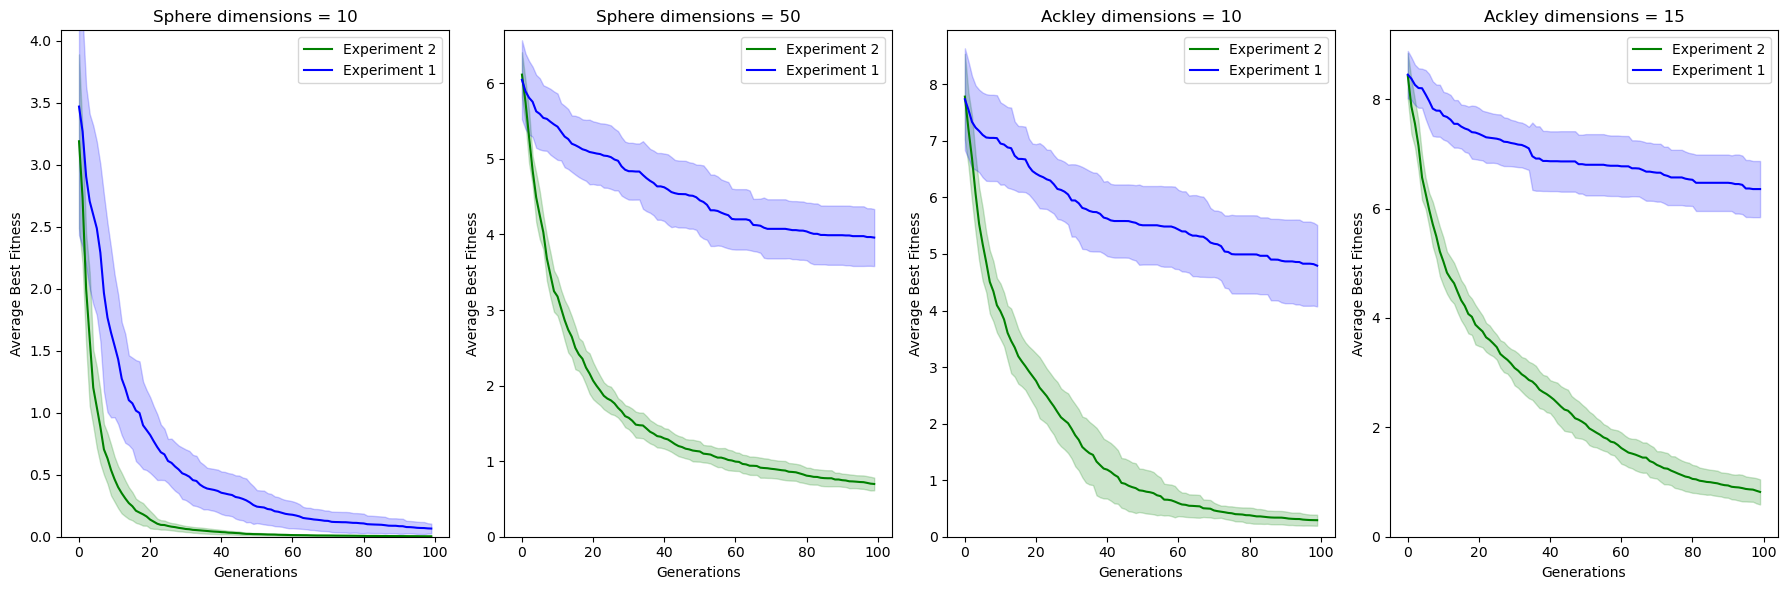

In [46]:
labels = [
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]  # DO NOT CHANGE

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=avgs_experiment_2,
    stds_experiment_2=stds_experiment_2,
    n_columns=4,
    n_queens=None,
)

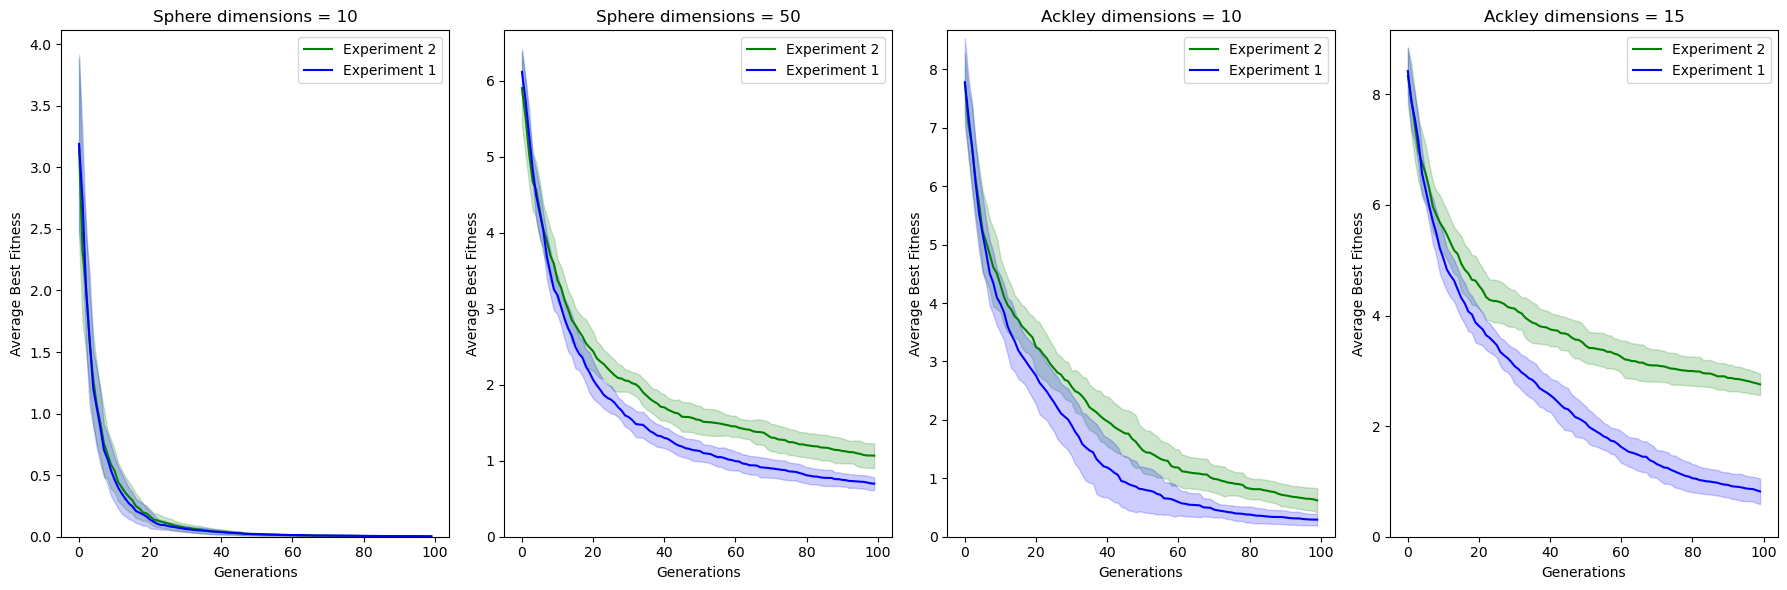

In [47]:
# Between Experiment 2 and Experiment 3
labels = [
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]  # DO NOT CHANGE

"""
Experiment 1: Experiment 2 in the case above
Experiment 2: Experiment 3 in the case above
"""
generate_subplot_function(
    avgs_experiment_2,
    stds_experiment_2,
    labels,
    avgs_experiment_2=avgs_experiment_3,
    stds_experiment_2=stds_experiment_3,
    n_columns=4,
    n_queens=None,
)

**Measuring the statistical significance of differences of two sets of experiment results**

The final step is to calculate whether the results from your set of hyperparameters (experiment 2) resulted in significantly better results.

To do this, we will perform a statistical test know as [rank-sum test](https://www.wikiwand.com/en/Mann%E2%80%93Whitney_U_test).

You will calculate the rank-sum for the results of the first and second experiments.

In [40]:
alpha = 0.05

# this loops over the 4 different functions we have
#   (Sphere dimensions = 10, Sphere dimensions =50, Ackley dimensions = 10, Ackley dimensions = 15)
labels = [
    "Sphere function 10 dimensions:",
    "Sphere function 50 dimensions:",
    "Ackley function 10 dimensions:",
    "Ackley function 15 dimensions:",
]
for i in range(4):
    runs_exp_2 = all_runs_experiment_2[i]
    runs_exp_3 = all_runs_experiment_3[i]

    best_per_run_exp_2 = [sublist[-1] for sublist in runs_exp_2]
    best_per_run_exp_3 = [sublist[-1] for sublist in runs_exp_3]

    t_statistic, p_value = ranksums(best_per_run_exp_2, best_per_run_exp_3)
    if p_value < alpha:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 2 average:",
            np.mean(best_per_run_exp_2),
            ", Experiment 3 average:",
            np.mean(best_per_run_exp_3),
            ",significant difference.",
        )
        # else:
        #    print(labels[i], "significant difference. Experiment 2 is better.")
    else:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 2 average:",
            np.mean(best_per_run_exp_2),
            ", Experiment 3 average:",
            np.mean(best_per_run_exp_3),
            ",no significant difference.",
        )
        # else:
        #    print(labels[i], "no significant difference. Experiment 2 is better.")

Sphere function 10 dimensions: Experiment 2 average: 0.0037613232309506076 , Experiment 3 average: 0.0034850794227959635 ,no significant difference.
Sphere function 50 dimensions: Experiment 2 average: 0.698081606190587 , Experiment 3 average: 1.022654521720435 ,significant difference.
Ackley function 10 dimensions: Experiment 2 average: 0.29218568122327043 , Experiment 3 average: 0.5604030934081111 ,significant difference.
Ackley function 15 dimensions: Experiment 2 average: 0.818966059822654 , Experiment 3 average: 2.695618411198832 ,significant difference.


In [ ]:
alpha = 0.05

# this loops over the 4 different functions we have
#   (Sphere dimensions = 10, Sphere dimensions =50, Ackley dimensions = 10, Ackley dimensions = 15)
labels = [
    "Sphere function 10 dimensions:",
    "Sphere function 50 dimensions:",
    "Ackley function 10 dimensions:",
    "Ackley function 15 dimensions:",
]
for i in range(4):
    runs_exp_2 = all_runs_experiment_2[i]
    runs_exp_3 = all_runs_experiment_3[i]

    best_per_run_exp_2 = [sublist[-1] for sublist in runs_exp_2]
    best_per_run_exp_3 = [sublist[-1] for sublist in runs_exp_3]

    t_statistic, p_value = ranksums(best_per_run_exp_2, best_per_run_exp_3)
    if p_value < alpha:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 1 average:",
            np.mean(best_per_run_exp_2),
            ", Experiment 2 average:",
            np.mean(best_per_run_exp_3),
            ",significant difference.",
        )
        # else:
        #    print(labels[i], "significant difference. Experiment 2 is better.")
    else:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 1 average:",
            np.mean(best_per_run_exp_2),
            ", Experiment 2 average:",
            np.mean(best_per_run_exp_3),
            ",no significant difference.",
        )
        # else:
        #    print(labels[i], "no significant difference. Experiment 2 is better.")

---
**Question 1.4 (0-0.3-0.6-0.9-1.2 pt):** Please improve the results significantly in each case (i.e. on Sphere and Ackley functions with 10, 50 and 10, 15 dimensions respectively) and discuss what kinds of changes you had to do to achieve this improvement. Please provide your reasoning why the new parameter settings worked better.

Grading:

0 pts: No answer or non of the cases were improved.

0.3 pts: At least one of the cases improved significantly but reasons why were not clearly explained.

0.6 pts: One or two cases improved significantly and the reasons why were somewhat clear.

0.9 pts: Three to four cases improved significanlty and the reasons why are clear.

1.2 pts: All of the cases improved significanlty and the reasons why are clear.


**Answer:** In experiment 1, the parent selection is completly random, and the survivor selction is based the probability transformed by their fitnesses, which means that individuals with lower fitness have lower chance to survive (but still a chance). In experiment to, the individuals with best fitness will be selected as parents as well as survivors, which means that individuals with lower fitness have no chance in the next generation.


---
## Part 2: Discrete Optimization (The N-Queens Problem, 5 points total) 

Implement an Evolutionary Algorithm for the **n-queens problem**.
Below is a visualization of a solution for the n-queens problem when n = 4. Observe that none of the queens are attacking each other.

We would like to implement an EA that can find a solution for any given N by N board but in this case it is required to place N queens where none of them attack each other.

You may use the implementation of the EA you used for solving continuous problems in Part 1. But remember, this is a discere problem so you would need to think about how to represent the solutions and search using the evolutionary operators.

Consider, what changes you would need to do! 


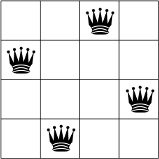


It is usually better to start simple and generalize your implementation. So, let's start with the case when **N = 4**.

**Question 2.1 (0-0.3 pt):** How do you represent a solution (a 4 queen placement on a 4x4 chess board)? In particular, specify the length of your genotype representation, what each gene (dimension) represents, and what values they can get.

**Answer:** PLEASE FILL IN

**Question 2.2 (0-0.2 pt)**: Please write down an example representation and discuss what it means.

**Answer:** PLEASE FILL IN

**Question 2.3 (0-0.2 pt):** How many possible solutions can be generated in your representation?

**Answer:** PLEASE FILL IN

---
**Task 2.1 (0-0.20-0.40-0.80):** Implementation of solution encoding, visualization and evaluation functions.

In [ ]:
################################################################


# example_solution = ? PLEASE FILL IN - how do you represent your solution?

################################################################

Write a function below that can visualize your solution. For instance, the output may look like below, a matrix representing the 4x4 chess board where each Q indicates a queen placement and dots are empty cells.


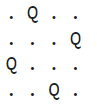

In [ ]:
def visualize_solution(solution):
    """Visualize the placement of queens on the chessboard."""

    ################################################################

    # PLEASE FILL IN

    ################################################################

Write the evaluation function to assess how good your solution is.

In [ ]:
def evaluate_solution_n_queens(solution):
    """Calculate the fitness of an solution."""
    ################################################################

    # PLEASE FILL IN

    # fitness = ?

    ################################################################

    return fitness

Try your implementations to see if your solution encoding matches to visualization and whether the fitness is computed correctly.

In [ ]:
#################################
# Grading
# 0 pts: No attempt, representation discussed does not match with the implementation and visualization, fitness is not correct.
# 0.20 : Solution representation matches with visualization, fitness computation is not correct, no explanation in the code.
# 0.50 : Solution representation matches with visualization, fitness computation is correct, no explanation in the code.
# 0.80 : Solution representation matches with visualization, fitness computation is correct, the implementation explained well.
################################################################


###################### DO NOT CHANGE #########################
print("Genotype (solution representation):", example_solution)
print("Phenotype (solution visualization):")
visualize_solution(example_solution)
print("Solution fitness", evaluate_solution_n_queens(example_solution))
###################### DO NOT CHANGE #########################

---

**Task 2.2 (0-0.4-0.8-1.2-1.6 pt):** Write an evolutionary algorithm that can initialize a population of solutions and finds N queen placement to NxN board optimizing the number of attacks (could be minimization or maximization based on your evaluation function of the solutions).

In [ ]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.4 pts if the code works but some functions are incorrect and it is badly explained
# 0.8 pts if the code works but some functions are incorrect but it is explained well
# 1.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 1.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


#initialize a population of solutions for the N queens problem where num_dims = N 
def initialization_n_queens(population_size, num_of_dims):
    """Generate a population of solutions."""
    ################################################################

    # PLEASE FILL IN

    # x = ?
    ################################################################

    return x #return population


def evaluation_n_queens(x):
    """Evaluate the whole population and return the fitness of each."""
    return [evaluate_solution_n_queens(solution) for solution in x]


def crossover_n_queens(x_parents, p_crossover):
    """Perform crossover to create offsprings."""

    ################################################################

    # PLEASE FILL IN
    # offspring = ?

    ################################################################

    return offspring


def mutation_n_queens(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    # PLEASE FILL IN
    # x = ?

    ################################################################

    return x


def parent_selection_n_queens(x, f):
    """Select parents for the next generation"""

    ################################################################

    # PLEASE FILL IN
    # x_parents = ?
    # f_parents = ?


    ####################################
    return x_parents, f_parents


def survivor_selection_n_queens(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""


    ################################################################

    #  PLEASE FILL IN
    # x = ?
    # f = ?

    ################################################################

    return x, f


def ea_n_queens(population_size, max_fit_evals, p_crossover, m_rate, num_of_dims):
    # Calculate the maximum number of generations
    max_generations = int(max_fit_evals / population_size)

    #########################
    #  PLEASE FILL IN
    
    #########################

    # Get best individual and append to list
    idx = np.argmax(f)
    x0_best = x[idx]
    f0_best = f[idx]
    x_best = [x0_best]
    f_best = [f0_best]

    # Loop over the generations
    for _ in range(max_generations - 1):
        # Select population size parents
        
        #########################
         #PLEASE FILL IN
            
        #########################

        # Find the best individual in current generation and add to the list
        idx = np.argmax(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best > f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

        # Append the best individual to the list
        f_best.append(fi_best)
        x_best.append(xi_best)
    return x_best, f_best

---
**Results:**

Run the code below to run an EA for N=8, 16 and 32, and visualize the best solutions found.


In [ ]:
print("Case when N=8:")

x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 8)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

In [ ]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(200, 100000, 0.9, 0.2, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

In [ ]:
print("Case when N=32:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 32)

print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

---

**Question 2.4 (0-0.2-0.4-0.6-1-1.5 pt):** Describe the results. What was the fitness found for each case? Were you able to find fitness scores of 8, 16 and 32 for N=8, 16 and 32 cases? How did you find them? Did you try improving the results by testing different parameters and/or evolutionary operators?

Grading:

0 pts: no solution or visualization provided.

0.2 pts: Solutions and visualizations were provided, no insights provided how the results achieved. 

0.4 pts: Solutions and visualizations were provided, at least for N=8, a optimum solution was found, limited/no insights provided on how this result is achieved. 

0.6 pts: Solutions and visualizations were provided, at least for N=8, a optimum solution was found, insights on how this result is achieved provided.

1 pts: Solutions and visualizations were provided, for N=8 and N=16, optimum solutions were found, insights on how this result is achieved provided. 

1.5 pts: Solutions and visualizations were provided, for N=8, N=16 and N=32, optimum solutions were found, insights on how this result is achieved provided. 

**Answer:** PLEASE FILL IN

---

#### Plotting the average performance of the algorithm
Use the cells below to plot the results of your algorithm similar to Part 1. The plots should show average and std of 10 runs of EA for n-queens problem for N=8, 16, 32.

In [28]:
def run_experiment_n_queens(population_size, p_crossover, m_rate):
    # These are the hyperparameters of your evolutionary algorithm. You are not allowed to change them.

    max_fit_evals = 10000

    fitness_8 = []
    fitness_16 = []
    fitness_32 = []

    runs = 10

    for run in range(runs):
        print("Run: ", run)

        _, f_best_8 = ea_n_queens(
            population_size[0], max_fit_evals, p_crossover[0], m_rate[0], num_of_dims=8
        )
        _, f_best_16 = ea_n_queens(
            population_size[1], max_fit_evals, p_crossover[1], m_rate[1], num_of_dims=16
        )
        _, f_best_32 = ea_n_queens(
            population_size[2], max_fit_evals, p_crossover[2], m_rate[2], num_of_dims=32
        )
        fitness_8.append(f_best_8)
        fitness_16.append(f_best_16)
        fitness_32.append(f_best_32)

    avg_8, std_8 = calculate_mean_std(fitness_8)
    avg_16, std_16 = calculate_mean_std(fitness_16)
    avg_32, std_32 = calculate_mean_std(fitness_32)

    avgs = [avg_8, avg_16, avg_32]
    stds = [std_8, std_16, std_32]
    all_runs = [fitness_8, fitness_16, fitness_32]

    return avgs, stds, all_runs

In [ ]:
population_size = [100, 100, 100]  # not allowed to change
p_crossover = [0.8, 0.8, 0.8]  # not allowed to change
m_rate = [0.1, 0.1, 0.1]  # not allowed to change

avgs_experiment_1, stds_experiment_1, all_runs_experiment_2 = run_experiment_n_queens(
    population_size, p_crossover, m_rate
)

In [ ]:
labels = ["N = 8", "N = 16", "N = 32"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=[8, 16, 32],
)

**Question 2.5 (0-0.2-0.4 pt)** Describe the average performance of the algorithm. What was the maximum average fitness found for each case? Do you see any differences between the problem cases?

**Answer**: PLEASE FILL IN

